#### Team Name: sso9282_sk11297_zy2891
#### Team Members: Simar Oberoi (sso9282), Soohan Kim (sk11297), Zehao Yang (zy2891) 

# PART 1

In [1]:
# Load dataset
data_path = '../data/facteus_10k_user_panel.zip'

import zipfile
import pandas as pd

zipped = zipfile.ZipFile(data_path, 'r')
df = pd.read_csv(zipped.open('facteus_10k_user_panel.csv'))
df.head(10)

,account,date,merchant,merchant_string_example,merchant_ticker,merchant_exchange,transactions,spend,spend_min,spend_max
0,a04:512:000ACA1D00B403C9BD4848010BBBCB63,2018-01-01 00:00:00 UTC,AMAZON,AMAZON MKTPLACE PMTS AMZN.COM/BILLWAUSPUGLV,AMZN,NASDAQ,2,4.72,1.88,2.84
1,a04:512:000ACA1D00B403C9BD4848010BBBCB63,2018-01-01 00:00:00 UTC,DUNKIN DONUTS,DUNKIN #308696 Q35 IRVINGTON NJUS0EBSE,DNKN,NASDAQ,1,7.33,7.33,7.33
2,a04:512:000ACA1D00B403C9BD4848010BBBCB63,2018-01-01 00:00:00 UTC,EXXON MOBIL,EXXONMOBIL 99243909 NEWARK NJUS1JJWD,XOM,NYSE,1,10.02,10.02,10.02
3,a04:512:000ACA1D00B403C9BD4848010BBBCB63,2018-01-01 00:00:00 UTC,PNC BANK,PNC BANK MAPYJCUN,PNC,NYSE,3,212.44,29.74,102.36
4,a04:512:000ACA1D00B403C9BD4848010BBBCB63,2018-02-01 00:00:00 UTC,AMAZON,AMAZON MKTPLACE PMTS AMZN.COM/BILLWAUSOA5ML,AMZN,NASDAQ,3,44.04,10.17,20.94
5,a04:512:000ACA1D00B403C9BD4848010BBBCB63,2018-02-01 00:00:00 UTC,IHOP,IHOP #2055 IRVINGTON NJUSZFZBP,DIN,NYSE,1,83.83,83.83,83.83
6,a04:512:000ACA1D00B403C9BD4848010BBBCB63,2018-02-01 00:00:00 UTC,PNC BANK,PNC BANK MAPV1IIP,PNC,NYSE,6,811.70,19.66,406.45
7,a04:512:000ACA1D00B403C9BD4848010BBBCB63,2018-02-01 00:00:00 UTC,SUBWAY,SUBWAY 00561274 HILLSIDE NJUSXZHFG,NaN,NaN,1,13.75,13.75,13.75
8,a04:512:000ACA1D00B403C9BD4848010BBBCB63,2018-02-01 00:00:00 UTC,WAWA,WAWA 8350 00083501 MAPLEWOOD NJUSBHZJA,NaN,NaN,1,14.96,14.96,14.96
9,a04:512:000ACA1D00B403C9BD4848010BBBCB63,2018-03-01 00:00:00 UTC,AMAZON,AMAZON MKTPLACE PMTS AMZN.COM/BILLWAUSPCVGF,AMZN,NASDAQ,1,21.05,21.05,21.05


In [2]:
# Check number of unique accounts & dates
print(len(df.account.unique()), len(df.date.unique()))

10000 36


### Form Pivot Table

In [3]:
# Extract necessary columns
acnt_date_spend = df[['account', 'date', 'spend']].copy()

# Change date format to daily scale
acnt_date_spend['date'] = pd.to_datetime(df['date']).dt.date

# Index by (account, date) pairs
acnt_date_spend.set_index(['account', 'date'], inplace=True)
acnt_date_spend

spend
account                                  date              
a04:512:000ACA1D00B403C9BD4848010BBBCB63 2018-01-01    4.72
                                         2018-01-01    7.33
                                         2018-01-01   10.02
                                         2018-01-01  212.44
                                         2018-02-01   44.04
...                                                     ...
a04:512:E61B330AB05882BB6F20F35565F07E64 2018-02-01  206.00
                                         2018-02-01   13.70
                                         2018-02-01    5.20
                                         2018-02-01   67.57
                                         2018-02-01   30.60

[4242945 rows x 1 columns]

In [4]:
# Aggregate total spend per month for each unique account
acnt_date_spend = acnt_date_spend.groupby(['account', 'date']).sum()
acnt_date_spend

spend
account                                  date               
a04:512:000ACA1D00B403C9BD4848010BBBCB63 2018-01-01   234.51
                                         2018-02-01   968.28
                                         2018-03-01    61.17
                                         2018-04-01   984.02
                                         2018-05-01  1126.64
...                                                      ...
b01:44132:975572515                      2020-08-01   106.35
                                         2020-09-01   816.56
                                         2020-10-01   488.69
                                         2020-11-01   459.72
                                         2020-12-01   308.09

[335028 rows x 1 columns]

In [5]:
# Form pivot table
acnt_date_spend = acnt_date_spend.unstack()
acnt_date_spend

spend                        \
date                                     2018-01-01 2018-02-01 2018-03-01   
account                                                                     
a04:512:000ACA1D00B403C9BD4848010BBBCB63     234.51     968.28      61.17   
a04:512:001102B925FF6841524DE5D8774A81A9        NaN        NaN        NaN   
a04:512:002038B3B84497A0947BAFF4A237C8B1    1023.05     860.21    1137.01   
a04:512:0022889224C5EB250061414C9B50B69A        NaN      92.64    2113.45   
a04:512:00247AEF269FF39090229B01ECF0B8CB        NaN        NaN        NaN   
...                                             ...        ...        ...   
b01:44132:975096837                             NaN        NaN        NaN   
b01:44132:975106352                             NaN        NaN        NaN   
b01:44132:975433531                             NaN        NaN        NaN   
b01:44132:975544339                             NaN        NaN        NaN   
b01:44132:975572515                             NaN        NaN        NaN   

                                                                           \
date                                     2018-04-01 2018-05-01 2018-06-01   
account                                                                     
a04:512:000ACA1D00B403C9BD4848010BBBCB63     984.02    1126.64     223.49   
a04:512:001102B925FF6841524DE5D8774A81A9        NaN        NaN        NaN   
a04:512:002038B3B84497A0947BAFF4A237C8B1    1096.18    1188.78    1404.04   
a04:512:0022889224C5EB250061414C9B50B69A      36.05        NaN        NaN   
a04:512:00247AEF269FF39090229B01ECF0B8CB     361.30     507.00    1107.90   
...                                             ...        ...        ...   
b01:44132:975096837                             NaN        NaN      30.27   
b01:44132:975106352                             NaN        NaN     214.80   
b01:44132:975433531                             NaN        NaN      19.58   
b01:44132:975544339                             NaN        NaN     194.17   
b01:44132:975572515                             NaN        NaN     182.86   

                                                                           \
date                                     2018-07-01 2018-08-01 2018-09-01   
account                                                                     
a04:512:000ACA1D00B403C9BD4848010BBBCB63     827.10    1341.73    1886.39   
a04:512:001102B925FF6841524DE5D8774A81A9     534.38     370.07      99.12   
a04:512:002038B3B84497A0947BAFF4A237C8B1    1767.25    1726.61    1246.46   
a04:512:0022889224C5EB250061414C9B50B69A      62.90      60.59     662.64   
a04:512:00247AEF269FF39090229B01ECF0B8CB     475.16     571.03     281.40   
...                                             ...        ...        ...   
b01:44132:975096837                          147.07     245.47     246.57   
b01:44132:975106352                          396.15     281.23     525.12   
b01:44132:975433531                          454.09     742.91     617.08   
b01:44132:975544339                          703.63     688.72     701.59   
b01:44132:975572515                          404.22     834.76     149.77   

                                                     ...             \
date                                     2018-10-01  ... 2020-03-01   
account                                              ...              
a04:512:000ACA1D00B403C9BD4848010BBBCB63    1476.78  ...     154.17   
a04:512:001102B925FF6841524DE5D8774A81A9     152.60  ...     163.24   
a04:512:002038B3B84497A0947BAFF4A237C8B1    1087.12  ...    1080.18   
a04:512:0022889224C5EB250061414C9B50B69A    1290.17  ...     599.87   
a04:512:00247AEF269FF39090229B01ECF0B8CB    1184.75  ...     336.69   
...                                             ...  ...        ...   
b01:44132:975096837                           57.82  ...     567.06   
b01:44132:975106352                           74.34  ...    1604.79   
b01:44132:975433531         

### Outlier Removal

Text(0.5, 1.0, 'Number of Null Values per User Histogram')

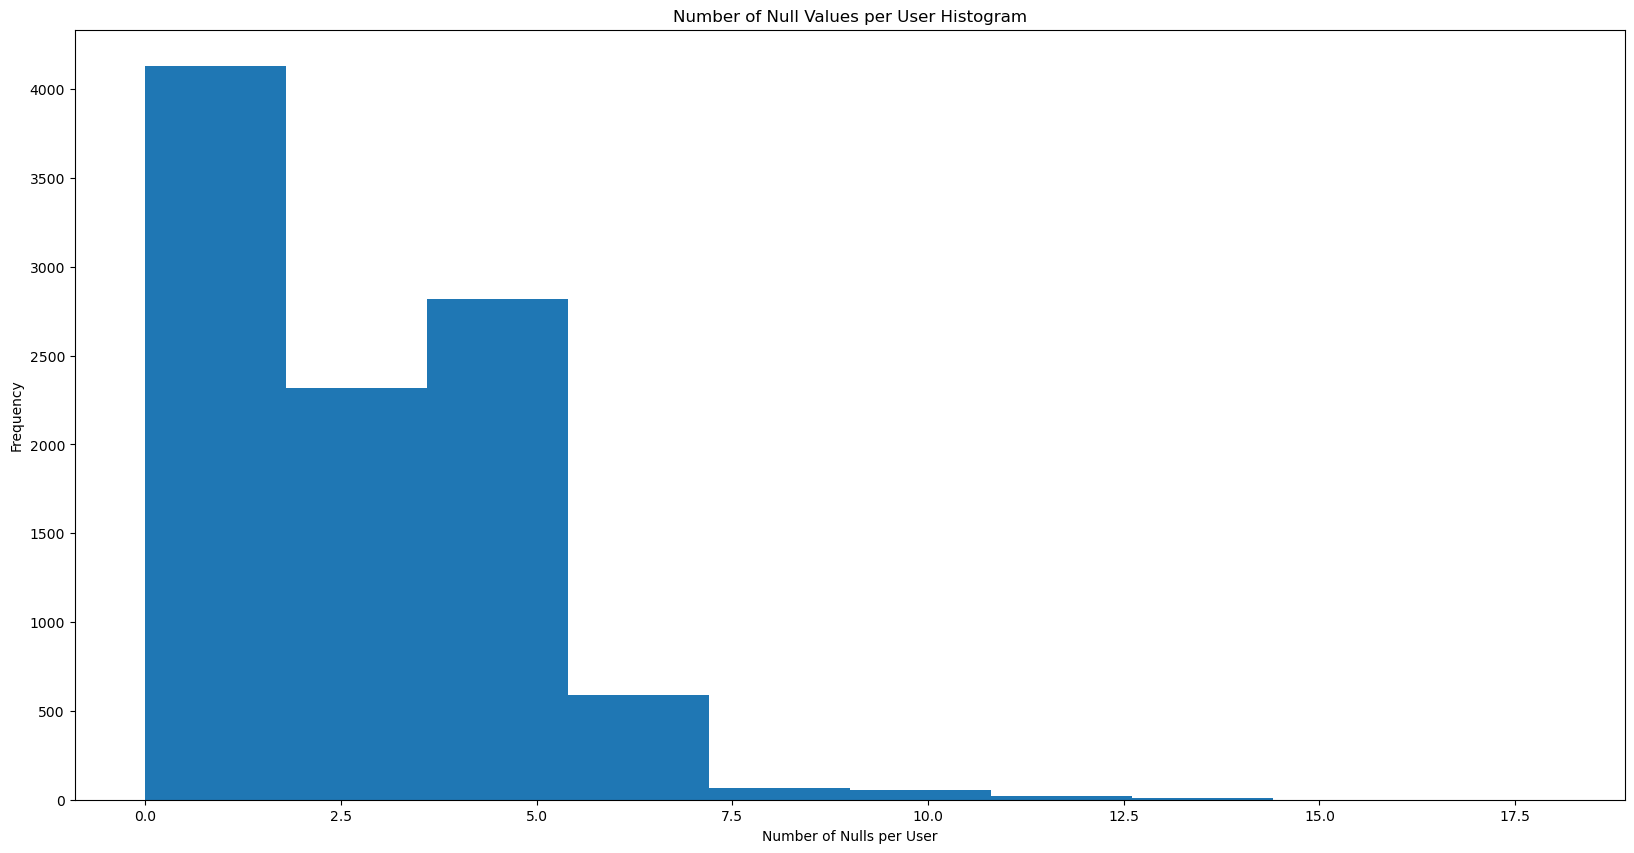

In [6]:
# Identify total NaNs across users
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.hist(acnt_date_spend.isna().sum(axis=1))
plt.xlabel('Number of Nulls per User')
plt.ylabel('Frequency')
plt.title('Number of Null Values per User Histogram')

In [7]:
# Erase Users with Number of Nulls > 7
acnt_date_spend1 = acnt_date_spend.loc[acnt_date_spend.isna().sum(axis=1) < 7]
acnt_date_spend1

spend                        \
date                                     2018-01-01 2018-02-01 2018-03-01   
account                                                                     
a04:512:000ACA1D00B403C9BD4848010BBBCB63     234.51     968.28      61.17   
a04:512:001102B925FF6841524DE5D8774A81A9        NaN        NaN        NaN   
a04:512:002038B3B84497A0947BAFF4A237C8B1    1023.05     860.21    1137.01   
a04:512:00247AEF269FF39090229B01ECF0B8CB        NaN        NaN        NaN   
a04:512:002F701CE2B77E5C387D6F56A6947A8B     210.50     494.50     794.53   
...                                             ...        ...        ...   
b01:44132:975096837                             NaN        NaN        NaN   
b01:44132:975106352                             NaN        NaN        NaN   
b01:44132:975433531                             NaN        NaN        NaN   
b01:44132:975544339                             NaN        NaN        NaN   
b01:44132:975572515                             NaN        NaN        NaN   

                                                                           \
date                                     2018-04-01 2018-05-01 2018-06-01   
account                                                                     
a04:512:000ACA1D00B403C9BD4848010BBBCB63     984.02    1126.64     223.49   
a04:512:001102B925FF6841524DE5D8774A81A9        NaN        NaN        NaN   
a04:512:002038B3B84497A0947BAFF4A237C8B1    1096.18    1188.78    1404.04   
a04:512:00247AEF269FF39090229B01ECF0B8CB     361.30     507.00    1107.90   
a04:512:002F701CE2B77E5C387D6F56A6947A8B     594.39     414.35     739.04   
...                                             ...        ...        ...   
b01:44132:975096837                             NaN        NaN      30.27   
b01:44132:975106352                             NaN        NaN     214.80   
b01:44132:975433531                             NaN        NaN      19.58   
b01:44132:975544339                             NaN        NaN     194.17   
b01:44132:975572515                             NaN        NaN     182.86   

                                                                           \
date                                     2018-07-01 2018-08-01 2018-09-01   
account                                                                     
a04:512:000ACA1D00B403C9BD4848010BBBCB63     827.10    1341.73    1886.39   
a04:512:001102B925FF6841524DE5D8774A81A9     534.38     370.07      99.12   
a04:512:002038B3B84497A0947BAFF4A237C8B1    1767.25    1726.61    1246.46   
a04:512:00247AEF269FF39090229B01ECF0B8CB     475.16     571.03     281.40   
a04:512:002F701CE2B77E5C387D6F56A6947A8B     508.26     684.11     703.37   
...                                             ...        ...        ...   
b01:44132:975096837                          147.07     245.47     246.57   
b01:44132:975106352                          396.15     281.23     525.12   
b01:44132:975433531                          454.09     742.91     617.08   
b01:44132:975544339                          703.63     688.72     701.59   
b01:44132:975572515                          404.22     834.76     149.77   

                                                     ...             \
date                                     2018-10-01  ... 2020-03-01   
account                                              ...              
a04:512:000ACA1D00B403C9BD4848010BBBCB63    1476.78  ...     154.17   
a04:512:001102B925FF6841524DE5D8774A81A9     152.60  ...     163.24   
a04:512:002038B3B84497A0947BAFF4A237C8B1    1087.12  ...    1080.18   
a04:512:00247AEF269FF39090229B01ECF0B8CB    1184.75  ...     336.69   
a04:512:002F701CE2B77E5C387D6F56A6947A8B     186.56  ...     363.86   
...                                             ...  ...        ...   
b01:44132:975096837                           57.82  ...     567.06   
b01:44132:975106352                           74.34  ...    1604.79   
b01:44132:975433531         

Text(0.5, 1.0, 'Null Score of Users Histogram')

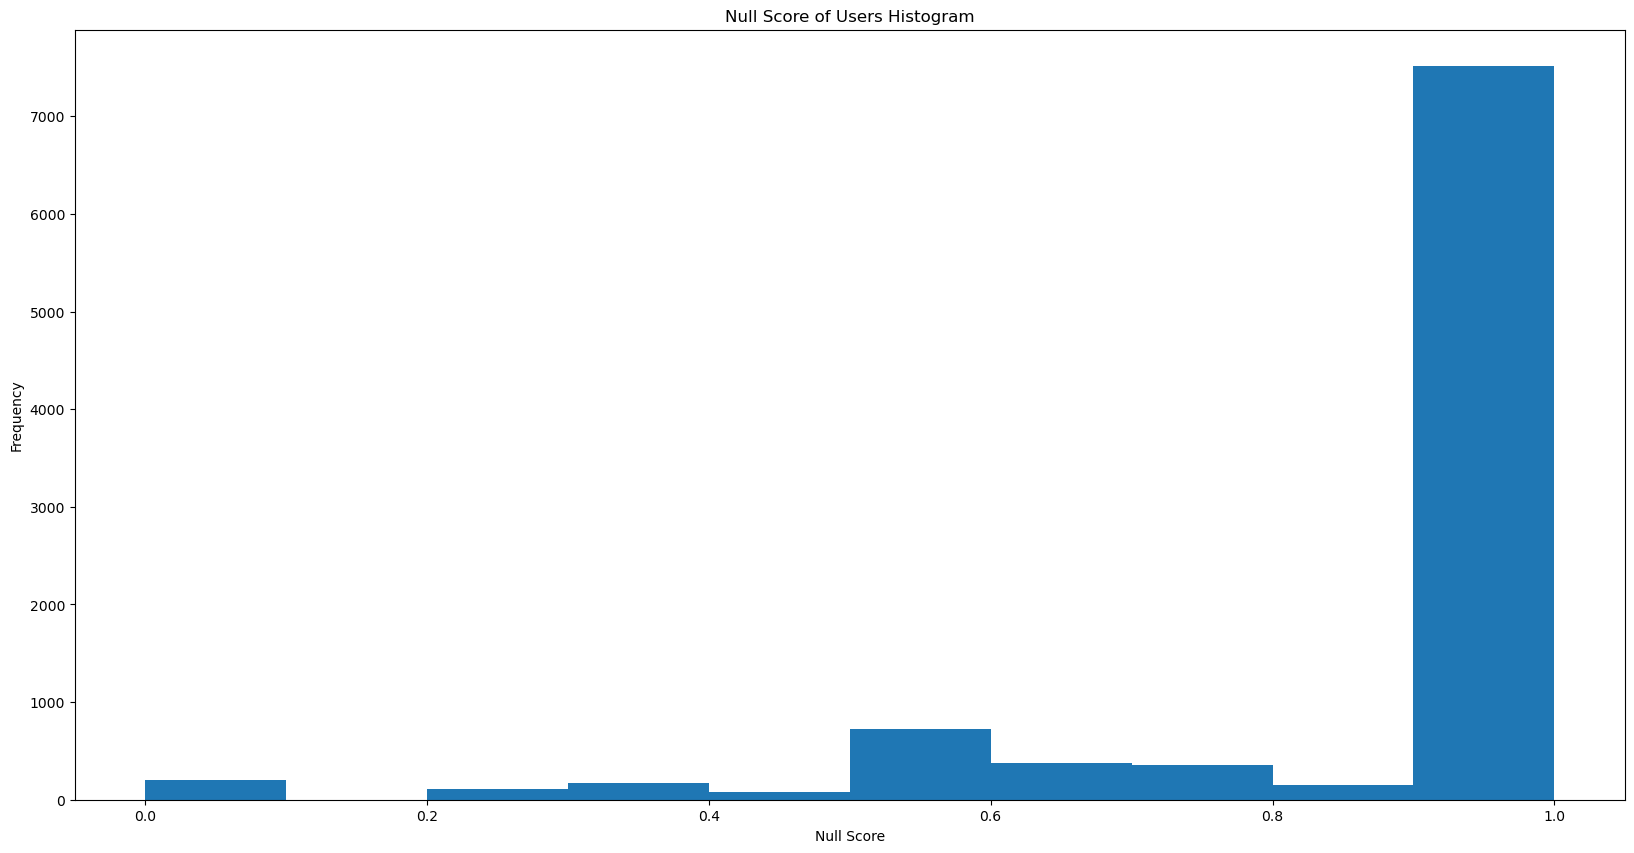

In [8]:
# Identify users with anomalous spending behavior by following score
# for each null value,
# assign x (0, 1, 2) where x is the number of neighboring null values (in the time dimension)
# and sum them across months & divide by the ideal case (2 + 2*(number of nulls - 2))
import numpy as np
import math

def null_score(row):
    if row.isna().sum() <= 2: # exclude these cases as there are only a few nulls which can be imputed
        return 1
    else:
        denom = 2 + 2*(row.isna().sum()-2)
        numer = 0
        
        row = list(row)
        for i in range(len(row)):
            if i == 0:
                if math.isnan(row[i]) and math.isnan(row[i+1]):
                    numer += 1
            elif i == len(row)-1:
                if math.isnan(row[i]) and math.isnan(row[i-1]):
                    numer += 1
            else:
                if math.isnan(row[i]):
                    if math.isnan(row[i+1]):
                        numer += 1
                    if math.isnan(row[i-1]):
                        numer += 1
    
    return numer/denom

acnt_date_spend2 = acnt_date_spend1.apply(null_score, axis=1)

plt.figure(figsize=(20,10))
plt.hist(acnt_date_spend2)
plt.xlabel('Null Score')
plt.ylabel('Frequency')
plt.title('Null Score of Users Histogram')

In [9]:
# Erase the zero scores
final_acnt_date_spend = acnt_date_spend1.loc[acnt_date_spend2 != 0.0]
final_acnt_date_spend

spend                        \
date                                     2018-01-01 2018-02-01 2018-03-01   
account                                                                     
a04:512:000ACA1D00B403C9BD4848010BBBCB63     234.51     968.28      61.17   
a04:512:001102B925FF6841524DE5D8774A81A9        NaN        NaN        NaN   
a04:512:002038B3B84497A0947BAFF4A237C8B1    1023.05     860.21    1137.01   
a04:512:00247AEF269FF39090229B01ECF0B8CB        NaN        NaN        NaN   
a04:512:002F701CE2B77E5C387D6F56A6947A8B     210.50     494.50     794.53   
...                                             ...        ...        ...   
b01:44132:975096837                             NaN        NaN        NaN   
b01:44132:975106352                             NaN        NaN        NaN   
b01:44132:975433531                             NaN        NaN        NaN   
b01:44132:975544339                             NaN        NaN        NaN   
b01:44132:975572515                             NaN        NaN        NaN   

                                                                           \
date                                     2018-04-01 2018-05-01 2018-06-01   
account                                                                     
a04:512:000ACA1D00B403C9BD4848010BBBCB63     984.02    1126.64     223.49   
a04:512:001102B925FF6841524DE5D8774A81A9        NaN        NaN        NaN   
a04:512:002038B3B84497A0947BAFF4A237C8B1    1096.18    1188.78    1404.04   
a04:512:00247AEF269FF39090229B01ECF0B8CB     361.30     507.00    1107.90   
a04:512:002F701CE2B77E5C387D6F56A6947A8B     594.39     414.35     739.04   
...                                             ...        ...        ...   
b01:44132:975096837                             NaN        NaN      30.27   
b01:44132:975106352                             NaN        NaN     214.80   
b01:44132:975433531                             NaN        NaN      19.58   
b01:44132:975544339                             NaN        NaN     194.17   
b01:44132:975572515                             NaN        NaN     182.86   

                                                                           \
date                                     2018-07-01 2018-08-01 2018-09-01   
account                                                                     
a04:512:000ACA1D00B403C9BD4848010BBBCB63     827.10    1341.73    1886.39   
a04:512:001102B925FF6841524DE5D8774A81A9     534.38     370.07      99.12   
a04:512:002038B3B84497A0947BAFF4A237C8B1    1767.25    1726.61    1246.46   
a04:512:00247AEF269FF39090229B01ECF0B8CB     475.16     571.03     281.40   
a04:512:002F701CE2B77E5C387D6F56A6947A8B     508.26     684.11     703.37   
...                                             ...        ...        ...   
b01:44132:975096837                          147.07     245.47     246.57   
b01:44132:975106352                          396.15     281.23     525.12   
b01:44132:975433531                          454.09     742.91     617.08   
b01:44132:975544339                          703.63     688.72     701.59   
b01:44132:975572515                          404.22     834.76     149.77   

                                                     ...             \
date                                     2018-10-01  ... 2020-03-01   
account                                              ...              
a04:512:000ACA1D00B403C9BD4848010BBBCB63    1476.78  ...     154.17   
a04:512:001102B925FF6841524DE5D8774A81A9     152.60  ...     163.24   
a04:512:002038B3B84497A0947BAFF4A237C8B1    1087.12  ...    1080.18   
a04:512:00247AEF269FF39090229B01ECF0B8CB    1184.75  ...     336.69   
a04:512:002F701CE2B77E5C387D6F56A6947A8B     186.56  ...     363.86   
...                                             ...  ...        ...   
b01:44132:975096837                           57.82  ...     567.06   
b01:44132:975106352                           74.34  ...    1604.79   
b01:44132:975433531         

### Imputation

#### Withhold 5%

In [10]:
# Assign 'nullable' probability to each position in the final dataset based on 
# null counts on the user and month dimensions

total_nulls = final_acnt_date_spend.isna().sum().sum()
user_null_probs = np.array(final_acnt_date_spend.isna().sum(axis=1)/total_nulls).reshape(-1, 1)
month_null_probs = np.array(final_acnt_date_spend.isna().sum(axis=0)/total_nulls).reshape(1, -1)

null_probs = user_null_probs@month_null_probs
print(null_probs.shape, null_probs.sum())

(9483, 36) 0.9999999999999997


In [11]:
# The support of this pmf should be for non-null values only
null_probs = pd.DataFrame(null_probs)
null_probs.index, null_probs.columns = final_acnt_date_spend.index, final_acnt_date_spend.columns
null_probs *= (~final_acnt_date_spend.isna()) 
null_probs

spend                        \
date                                     2018-01-01 2018-02-01 2018-03-01   
account                                                                     
a04:512:000ACA1D00B403C9BD4848010BBBCB63   0.000055   0.000044   0.000033   
a04:512:001102B925FF6841524DE5D8774A81A9   0.000000   0.000000   0.000000   
a04:512:002038B3B84497A0947BAFF4A237C8B1   0.000000   0.000000   0.000000   
a04:512:00247AEF269FF39090229B01ECF0B8CB   0.000000   0.000000   0.000000   
a04:512:002F701CE2B77E5C387D6F56A6947A8B   0.000046   0.000037   0.000028   
...                                             ...        ...        ...   
b01:44132:975096837                        0.000000   0.000000   0.000000   
b01:44132:975106352                        0.000000   0.000000   0.000000   
b01:44132:975433531                        0.000000   0.000000   0.000000   
b01:44132:975544339                        0.000000   0.000000   0.000000   
b01:44132:975572515                        0.000000   0.000000   0.000000   

                                                                           \
date                                     2018-04-01 2018-05-01 2018-06-01   
account                                                                     
a04:512:000ACA1D00B403C9BD4848010BBBCB63   0.000025   0.000015   0.000005   
a04:512:001102B925FF6841524DE5D8774A81A9   0.000000   0.000000   0.000000   
a04:512:002038B3B84497A0947BAFF4A237C8B1   0.000000   0.000000   0.000000   
a04:512:00247AEF269FF39090229B01ECF0B8CB   0.000021   0.000013   0.000004   
a04:512:002F701CE2B77E5C387D6F56A6947A8B   0.000021   0.000013   0.000004   
...                                             ...        ...        ...   
b01:44132:975096837                        0.000000   0.000000   0.000004   
b01:44132:975106352                        0.000000   0.000000   0.000004   
b01:44132:975433531                        0.000000   0.000000   0.000004   
b01:44132:975544339                        0.000000   0.000000   0.000004   
b01:44132:975572515                        0.000000   0.000000   0.000004   

                                                                           \
date                                     2018-07-01 2018-08-01 2018-09-01   
account                                                                     
a04:512:000ACA1D00B403C9BD4848010BBBCB63   0.000004   0.000003   0.000003   
a04:512:001102B925FF6841524DE5D8774A81A9   0.000004   0.000003   0.000003   
a04:512:002038B3B84497A0947BAFF4A237C8B1   0.000000   0.000000   0.000000   
a04:512:00247AEF269FF39090229B01ECF0B8CB   0.000003   0.000003   0.000003   
a04:512:002F701CE2B77E5C387D6F56A6947A8B   0.000003   0.000003   0.000003   
...                                             ...        ...        ...   
b01:44132:975096837                        0.000003   0.000003   0.000003   
b01:44132:975106352                        0.000003   0.000003   0.000003   
b01:44132:975433531                        0.000003   0.000003   0.000003   
b01:44132:975544339                        0.000003   0.000003   0.000003   
b01:44132:975572515                        0.000003   0.000003   0.000003   

                                                     ...             \
date                                     2018-10-01  ... 2020-03-01   
account                                              ...              
a04:512:000ACA1D00B403C9BD4848010BBBCB63   0.000003  ...   0.000003   
a04:512:001102B925FF6841524DE5D8774A81A9   0.000003  ...   0.000003   
a04:512:002038B3B84497A0947BAFF4A237C8B1   0.000000  ...   0.000000   
a04:512:00247AEF269FF39090229B01ECF0B8CB   0.000002  ...   0.000002   
a04:512:002F701CE2B77E5C387D6F56A6947A8B   0.000002  ...   0.000002   
...                                             ...  ...        ...   
b01:44132:975096837                        0.000002  ...   0.000002   
b01:44132:975106352                        0.000002  ...   0.000002   
b01:44132:975433531         

In [12]:
# Renormalize null probabilities to sum to 1
null_probs /= null_probs.sum().sum()
null_probs.sum().sum()

1.0000000000000009

In [13]:
# Sample data to withhold from null probabilities - first create mask of selected indices
np.random.seed(1)
flat_probs = np.array(null_probs).ravel()
total_datapoints = np.array(null_probs).flatten().shape[0]
sampled_flat_indices = np.random.choice(len(flat_probs), size=int(total_datapoints*0.05), replace=False, p=flat_probs)
sampled_indices = np.unravel_index(sampled_flat_indices, null_probs.shape)
sampled_indices_mask = np.zeros_like(null_probs, dtype=int)
sampled_indices_mask[sampled_indices] = 1
sampled_indices_mask.sum().sum() # we see total number of withheld data points as 5% of the original data as expected

17069

In [14]:
# Store withheld data separately
final_acnt_date_spend_withheld = final_acnt_date_spend*sampled_indices_mask
final_acnt_date_spend_withheld

spend                        \
date                                     2018-01-01 2018-02-01 2018-03-01   
account                                                                     
a04:512:000ACA1D00B403C9BD4848010BBBCB63     234.51     968.28       0.00   
a04:512:001102B925FF6841524DE5D8774A81A9        NaN        NaN        NaN   
a04:512:002038B3B84497A0947BAFF4A237C8B1       0.00       0.00       0.00   
a04:512:00247AEF269FF39090229B01ECF0B8CB        NaN        NaN        NaN   
a04:512:002F701CE2B77E5C387D6F56A6947A8B     210.50     494.50     794.53   
...                                             ...        ...        ...   
b01:44132:975096837                             NaN        NaN        NaN   
b01:44132:975106352                             NaN        NaN        NaN   
b01:44132:975433531                             NaN        NaN        NaN   
b01:44132:975544339                             NaN        NaN        NaN   
b01:44132:975572515                             NaN        NaN        NaN   

                                                                           \
date                                     2018-04-01 2018-05-01 2018-06-01   
account                                                                     
a04:512:000ACA1D00B403C9BD4848010BBBCB63        0.0       0.00       0.00   
a04:512:001102B925FF6841524DE5D8774A81A9        NaN        NaN        NaN   
a04:512:002038B3B84497A0947BAFF4A237C8B1        0.0       0.00       0.00   
a04:512:00247AEF269FF39090229B01ECF0B8CB        0.0     507.00       0.00   
a04:512:002F701CE2B77E5C387D6F56A6947A8B        0.0     414.35       0.00   
...                                             ...        ...        ...   
b01:44132:975096837                             NaN        NaN       0.00   
b01:44132:975106352                             NaN        NaN       0.00   
b01:44132:975433531                             NaN        NaN       0.00   
b01:44132:975544339                             NaN        NaN       0.00   
b01:44132:975572515                             NaN        NaN     182.86   

                                                                           \
date                                     2018-07-01 2018-08-01 2018-09-01   
account                                                                     
a04:512:000ACA1D00B403C9BD4848010BBBCB63      827.1       0.00       0.00   
a04:512:001102B925FF6841524DE5D8774A81A9        0.0       0.00       0.00   
a04:512:002038B3B84497A0947BAFF4A237C8B1        0.0       0.00       0.00   
a04:512:00247AEF269FF39090229B01ECF0B8CB        0.0       0.00       0.00   
a04:512:002F701CE2B77E5C387D6F56A6947A8B        0.0       0.00       0.00   
...                                             ...        ...        ...   
b01:44132:975096837                             0.0       0.00       0.00   
b01:44132:975106352                             0.0     281.23       0.00   
b01:44132:975433531                             0.0       0.00       0.00   
b01:44132:975544339                             0.0       0.00       0.00   
b01:44132:975572515                             0.0       0.00     149.77   

                                                     ...             \
date                                     2018-10-01  ... 2020-03-01   
account                                              ...              
a04:512:000ACA1D00B403C9BD4848010BBBCB63        0.0  ...       0.00   
a04:512:001102B925FF6841524DE5D8774A81A9        0.0  ...       0.00   
a04:512:002038B3B84497A0947BAFF4A237C8B1        0.0  ...       0.00   
a04:512:00247AEF269FF39090229B01ECF0B8CB        0.0  ...       0.00   
a04:512:002F701CE2B77E5C387D6F56A6947A8B        0.0  ...       0.00   
...                                             ...  ...        ...   
b01:44132:975096837                             0.0  ...     567.06   
b01:44132:975106352                             0.0  ...       0.00   
b01:44132:975433531         

In [15]:
# Erase withheld data from original dataset
final_acnt_date_spend_train = (final_acnt_date_spend*(1 - sampled_indices_mask)).replace(0, np.nan)
final_acnt_date_spend_train

spend                        \
date                                     2018-01-01 2018-02-01 2018-03-01   
account                                                                     
a04:512:000ACA1D00B403C9BD4848010BBBCB63        NaN        NaN      61.17   
a04:512:001102B925FF6841524DE5D8774A81A9        NaN        NaN        NaN   
a04:512:002038B3B84497A0947BAFF4A237C8B1    1023.05     860.21    1137.01   
a04:512:00247AEF269FF39090229B01ECF0B8CB        NaN        NaN        NaN   
a04:512:002F701CE2B77E5C387D6F56A6947A8B        NaN        NaN        NaN   
...                                             ...        ...        ...   
b01:44132:975096837                             NaN        NaN        NaN   
b01:44132:975106352                             NaN        NaN        NaN   
b01:44132:975433531                             NaN        NaN        NaN   
b01:44132:975544339                             NaN        NaN        NaN   
b01:44132:975572515                             NaN        NaN        NaN   

                                                                           \
date                                     2018-04-01 2018-05-01 2018-06-01   
account                                                                     
a04:512:000ACA1D00B403C9BD4848010BBBCB63     984.02    1126.64     223.49   
a04:512:001102B925FF6841524DE5D8774A81A9        NaN        NaN        NaN   
a04:512:002038B3B84497A0947BAFF4A237C8B1    1096.18    1188.78    1404.04   
a04:512:00247AEF269FF39090229B01ECF0B8CB     361.30        NaN    1107.90   
a04:512:002F701CE2B77E5C387D6F56A6947A8B     594.39        NaN     739.04   
...                                             ...        ...        ...   
b01:44132:975096837                             NaN        NaN      30.27   
b01:44132:975106352                             NaN        NaN     214.80   
b01:44132:975433531                             NaN        NaN      19.58   
b01:44132:975544339                             NaN        NaN     194.17   
b01:44132:975572515                             NaN        NaN        NaN   

                                                                           \
date                                     2018-07-01 2018-08-01 2018-09-01   
account                                                                     
a04:512:000ACA1D00B403C9BD4848010BBBCB63        NaN    1341.73    1886.39   
a04:512:001102B925FF6841524DE5D8774A81A9     534.38     370.07      99.12   
a04:512:002038B3B84497A0947BAFF4A237C8B1    1767.25    1726.61    1246.46   
a04:512:00247AEF269FF39090229B01ECF0B8CB     475.16     571.03     281.40   
a04:512:002F701CE2B77E5C387D6F56A6947A8B     508.26     684.11     703.37   
...                                             ...        ...        ...   
b01:44132:975096837                          147.07     245.47     246.57   
b01:44132:975106352                          396.15        NaN     525.12   
b01:44132:975433531                          454.09     742.91     617.08   
b01:44132:975544339                          703.63     688.72     701.59   
b01:44132:975572515                          404.22     834.76        NaN   

                                                     ...             \
date                                     2018-10-01  ... 2020-03-01   
account                                              ...              
a04:512:000ACA1D00B403C9BD4848010BBBCB63    1476.78  ...     154.17   
a04:512:001102B925FF6841524DE5D8774A81A9     152.60  ...     163.24   
a04:512:002038B3B84497A0947BAFF4A237C8B1    1087.12  ...    1080.18   
a04:512:00247AEF269FF39090229B01ECF0B8CB    1184.75  ...     336.69   
a04:512:002F701CE2B77E5C387D6F56A6947A8B     186.56  ...     363.86   
...                                             ...  ...        ...   
b01:44132:975096837                           57.82  ...        NaN   
b01:44132:975106352                           74.34  ...    1604.79   
b01:44132:975433531         

In [16]:
# check ratio of total number of nulls to total number of data points
final_acnt_date_spend_train.isna().sum().sum()/(9483*36)

0.11357751297643737

#### Impute

In [17]:
# Perform imputation on train dataset with KNN
from fancyimpute import KNN

knn_imputer = KNN() 
imputed = knn_imputer.fit_transform(final_acnt_date_spend_train)

Imputing row 1/9483 with 12 missing, elapsed time: 27.718
Imputing row 101/9483 with 9 missing, elapsed time: 27.769
Imputing row 201/9483 with 8 missing, elapsed time: 27.796
Imputing row 301/9483 with 7 missing, elapsed time: 27.843
Imputing row 401/9483 with 0 missing, elapsed time: 27.869
Imputing row 501/9483 with 2 missing, elapsed time: 27.906
Imputing row 601/9483 with 4 missing, elapsed time: 27.937
Imputing row 701/9483 with 6 missing, elapsed time: 27.970
Imputing row 801/9483 with 0 missing, elapsed time: 28.002
Imputing row 901/9483 with 0 missing, elapsed time: 28.040
Imputing row 1001/9483 with 7 missing, elapsed time: 28.072
Imputing row 1101/9483 with 6 missing, elapsed time: 28.103
Imputing row 1201/9483 with 6 missing, elapsed time: 28.135
Imputing row 1301/9483 with 0 missing, elapsed time: 28.170
Imputing row 1401/9483 with 7 missing, elapsed time: 28.201
Imputing row 1501/9483 with 8 missing, elapsed time: 28.232
Imputing row 1601/9483 with 2 missing, elapsed time

#### Evaluate Imputation Results

Text(0.5, 1.0, 'Absolute Percentage Error of Imputed Data vs. Withheld')

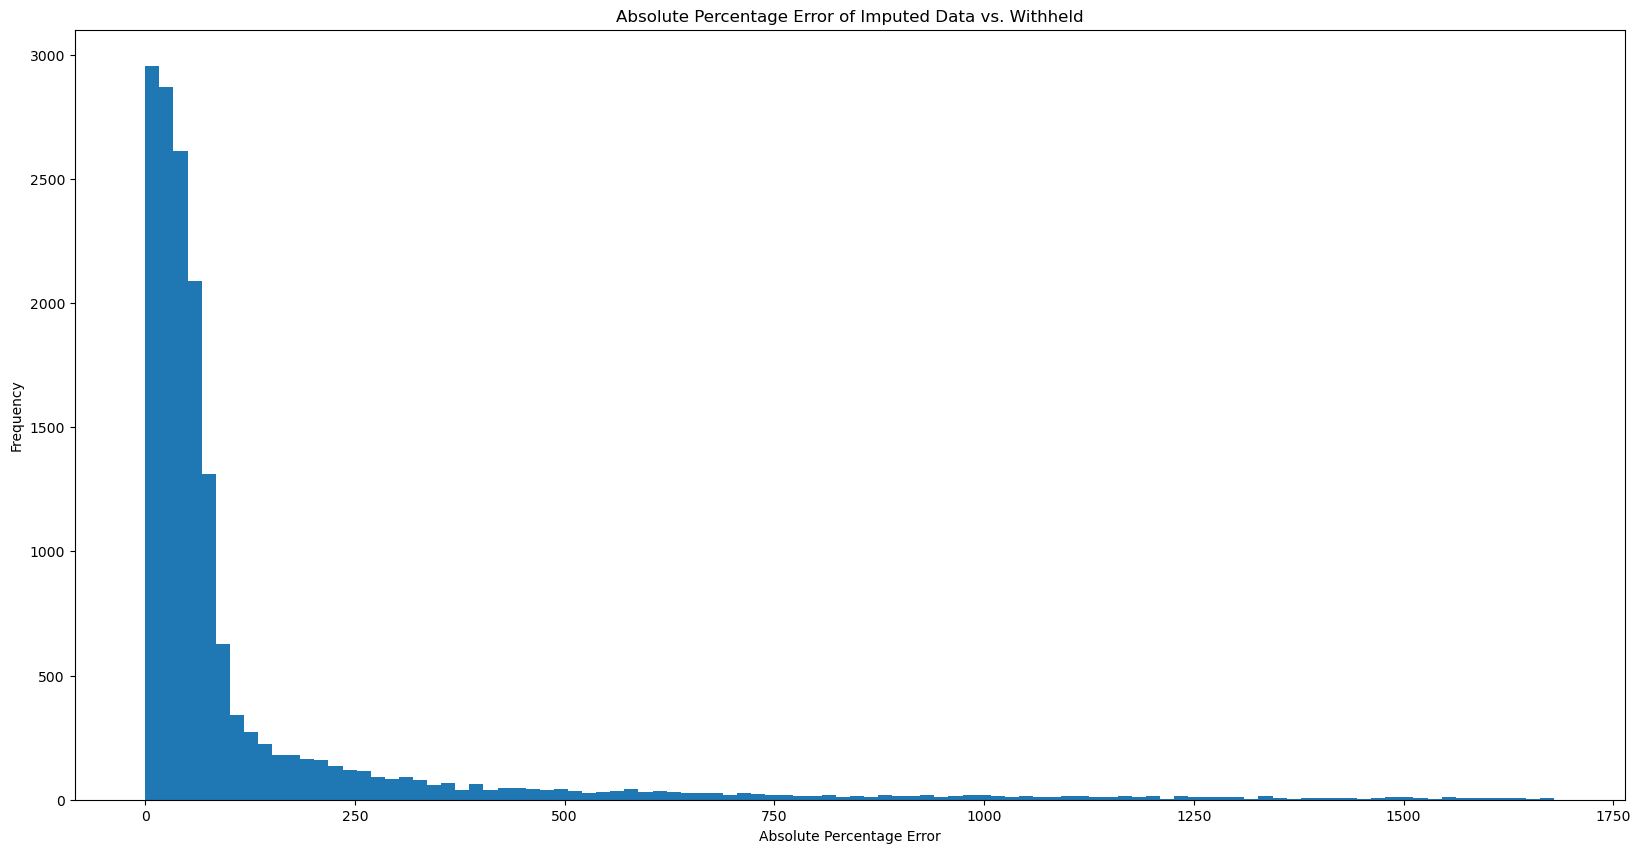

In [18]:
# Compare results with withheld dataset
imputed = pd.DataFrame(imputed)
imputed.index, imputed.columns = final_acnt_date_spend.index, final_acnt_date_spend.columns
div = np.array(final_acnt_date_spend_withheld.fillna(0.0)).flatten()
div = div[div != 0.0]
impute_errors = np.array(((imputed - final_acnt_date_spend_withheld).abs()*sampled_indices_mask).fillna(0.0)).flatten()
impute_errors = 100*impute_errors[impute_errors != 0.0]/div

plt.figure(figsize=(20,10))
# removing outlier predictions for better visibility of errors
plt.hist(impute_errors[impute_errors <= np.percentile(impute_errors, 95)], bins=100) 
plt.xlabel('Absolute Percentage Error')
plt.ylabel('Frequency')
plt.title('Absolute Percentage Error of Imputed Data vs. Withheld')

Text(0.5, 1.0, 'Total Spend vs. Imputation Error')

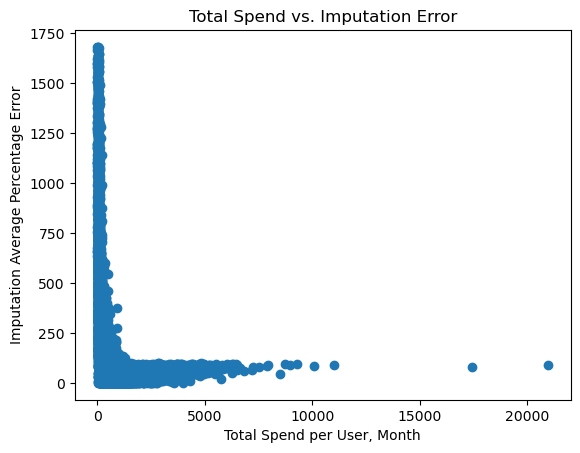

In [19]:
# See error behavior compared to total spend quantities
plt.scatter(div[impute_errors <= np.percentile(impute_errors, 95)], impute_errors[impute_errors <= np.percentile(impute_errors, 95)])
plt.xlabel('Total Spend per User, Month')
plt.ylabel('Imputation Average Percentage Error')
plt.title('Total Spend vs. Imputation Error')
# we see that majority of large errors are concentrated on small total spend amounts below

# PART 2

## Extract Data

In [2]:
# Extract relevant data
acnt_date_merc_spend = df[['account', 'date', 'merchant', 'spend']].copy()
acnt_date_merc_spend['date'] = pd.to_datetime(df['date']).dt.date
acnt_date_merc_spend

,account,date,merchant,spend
0,a04:512:000ACA1D00B403C9BD4848010BBBCB63,2018-01-01,AMAZON,4.72
1,a04:512:000ACA1D00B403C9BD4848010BBBCB63,2018-01-01,DUNKIN DONUTS,7.33
2,a04:512:000ACA1D00B403C9BD4848010BBBCB63,2018-01-01,EXXON MOBIL,10.02
3,a04:512:000ACA1D00B403C9BD4848010BBBCB63,2018-01-01,PNC BANK,212.44
4,a04:512:000ACA1D00B403C9BD4848010BBBCB63,2018-02-01,AMAZON,44.04
...,...,...,...,...
4242940,a04:512:E61B330AB05882BB6F20F35565F07E64,2018-02-01,7-ELEVEN,206.00
4242941,a04:512:E61B330AB05882BB6F20F35565F07E64,2018-02-01,AMC THEATRES,13.70
4242942,a04:512:E61B330AB05882BB6F20F35565F07E64,2018-02-01,ARBYS,5.20
4242943,a04:512:E61B330AB05882BB6F20F35565F07E64,2018-02-01,BATH & BODY WORKS,67.57


In [3]:
# Organize relevant data by (# accounts, # merchants, # months) arrays

from tqdm import tqdm
date_spend_matrices = {} # store (# merchants, # accounts) spend data for each month (month start date)
for d in tqdm(acnt_date_merc_spend.date.unique()): # iterate per date (for efficiency vs. account)
    # aggregate total spend per merchant and account
    cur = acnt_date_merc_spend[acnt_date_merc_spend.date == d].drop(columns=['date']).groupby(['merchant', 'account']).sum().unstack()

    # align index and column levels and naming to allow smooth expansion below
    cur.index.name = None
    cur.columns = cur.columns.droplevel(0)
    cur.columns.name = None

    # expand index to cover all merchants and dates
    cur = cur.reindex(index=acnt_date_merc_spend.merchant.unique(), columns=acnt_date_merc_spend.account.unique())
    date_spend_matrices[d] = cur

100%|██████████| 36/36 [00:37<00:00,  1.05s/it]


In [4]:
for d in date_spend_matrices: # check that the shapes of the matrices are as expected
    print(d, date_spend_matrices[d].shape)

2018-01-01 (1390, 10000)
2018-02-01 (1390, 10000)
2018-03-01 (1390, 10000)
2018-04-01 (1390, 10000)
2018-05-01 (1390, 10000)
2018-06-01 (1390, 10000)
2018-07-01 (1390, 10000)
2018-08-01 (1390, 10000)
2018-09-01 (1390, 10000)
2018-10-01 (1390, 10000)
2018-11-01 (1390, 10000)
2018-12-01 (1390, 10000)
2019-01-01 (1390, 10000)
2019-02-01 (1390, 10000)
2019-03-01 (1390, 10000)
2019-04-01 (1390, 10000)
2019-05-01 (1390, 10000)
2019-06-01 (1390, 10000)
2019-07-01 (1390, 10000)
2019-08-01 (1390, 10000)
2019-09-01 (1390, 10000)
2019-10-01 (1390, 10000)
2019-11-01 (1390, 10000)
2019-12-01 (1390, 10000)
2020-01-01 (1390, 10000)
2020-02-01 (1390, 10000)
2020-03-01 (1390, 10000)
2020-04-01 (1390, 10000)
2020-08-01 (1390, 10000)
2020-12-01 (1390, 10000)
2020-05-01 (1390, 10000)
2020-06-01 (1390, 10000)
2020-07-01 (1390, 10000)
2020-09-01 (1390, 10000)
2020-10-01 (1390, 10000)
2020-11-01 (1390, 10000)


In [7]:
# Manipulate via numpy to obtain (# accounts, # merchants, # months) matrices
acnt_merc_mos = np.transpose(np.stack(list(date_spend_matrices.values()), axis=0), axes=(2, 1, 0))
acnt_merc_mos.shape # note that the ordering of the accounts, merchants, months are preserved from the original data

(10000, 1390, 36)

## Construct Distance Metrics

In [8]:
acnt_merc_mos[np.isnan(acnt_merc_mos)] = 0.0 # convert nans to zeroes for ease of distance metric calculation

### Cosine Similarity of Total Spend Time-series

- Why this metric?

This metric measures the cosine distance between the time-series of total spends for each user, where the total spends are aggregated across all merchants for every month. We choose this metric as it offers a high-level intuitive perspective of how users' shopping behavior are similar across time.

- Connection to human shopping behavior

This metric assigns similarity scores based on how much spending amounts are close between users for each month. The underlying rationale is that if two users spend around the same amount at each month, they can be grouped as having similar needs, expenses, and preferences in how they spend around the year.

- Pros

It captures the similarity of different users' spend behavior across time.

- Cons

The similarity of spend behavior across different merchants get lost.

In [9]:
# Define cosine similarity of total spend time-series metric
def cos_sim(x1, x2): # operates on flattened matrices
    # first reshape to matrix form and aggregate in the merchant dimension
    x1 = x1.reshape(acnt_merc_mos.shape[1], acnt_merc_mos.shape[2]).sum(axis=0)
    x2 = x2.reshape(acnt_merc_mos.shape[1], acnt_merc_mos.shape[2]).sum(axis=0)

    # measure cosine similarity
    return (x1@x2)/(np.linalg.norm(x1)*np.linalg.norm(x2))

### Weighted Jaccard 

- Why this metric?

We choose this metric as it measures the overall similarity across both merchant and month dimensions. It also allows an intuitive explanation of the distance between users as a value close to 1 means that two users spent nearly the same amount at same merchants for each month.

- Connection to human shopping behavior

The metric measures similarity of users' spend allocation across merchants and consistency of shopping behavior across time. For example, the metric successfully divides consistent shoppers versus erratic, one-off purchase shoppers for each merchant - which captures brand-preference and loyalty of the users.

- Pros

It allows a holistic view of the similarity between two users' spending patterns and handles sparse data well while capturing the information contained in the magnitude of spend amounts as well since it works with both overlap and proportionality.

- Cons

It fails to yield meaningful interpretability in edge cases such as when the overlap is perfect but the magnitude of the spend amounts are extremely different (e.g. one user spends little and the other a lot) as in this case the metric will be small even though there is clearly some similarity involved as the two users spend money at exactly the same merchants for every month.

In [10]:
# Define Weighted Jaccard Metric
def weighted_jaccard(x1, x2): # operates on flattened matrices x1, x2
    # x1: of shape (# features,)
    # x2: of shape (# accounts, # features) for vectorization
    intersection = np.sum(np.minimum(x1.reshape(1, -1), x2), axis=1)
    union = np.sum(np.maximum(x1.reshape(1, -1), x2), axis=1)
    return 1 - (intersection / (union + 1e-10)) # reversed as metric needs to be low for distance to be small in clustering

## Get Clustering Results

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Using cosine similarity for computational reasons
X = np.sum(acnt_merc_mos, axis=-2)
for i in range(X.shape[0]):
    X[i, :] /= np.linalg.norm(X[i, :]) # normalize first for stability in fit downstream
distance_matrix = X@X.T

(array([[7.000e+00, 7.400e+01, 2.730e+02, ..., 2.389e+03, 5.010e+02,
         4.000e+00],
        [5.000e+00, 6.200e+01, 2.620e+02, ..., 2.397e+03, 5.780e+02,
         1.500e+01],
        [0.000e+00, 0.000e+00, 4.000e+00, ..., 3.098e+03, 3.620e+03,
         6.200e+02],
        ...,
        [0.000e+00, 1.600e+01, 8.300e+01, ..., 3.289e+03, 1.266e+03,
         8.000e+00],
        [3.000e+00, 4.100e+01, 1.500e+02, ..., 1.400e+03, 1.150e+02,
         7.000e+00],
        [1.100e+01, 1.500e+02, 4.220e+02, ..., 1.246e+03, 8.300e+01,
         1.000e+00]]),
 array([9.25723866e-04, 1.00833151e-01, 2.00740579e-01, 3.00648007e-01,
        4.00555434e-01, 5.00462862e-01, 6.00370290e-01, 7.00277717e-01,
        8.00185145e-01, 9.00092572e-01, 1.00000000e+00]),
 <a list of 10000 BarContainer objects>)

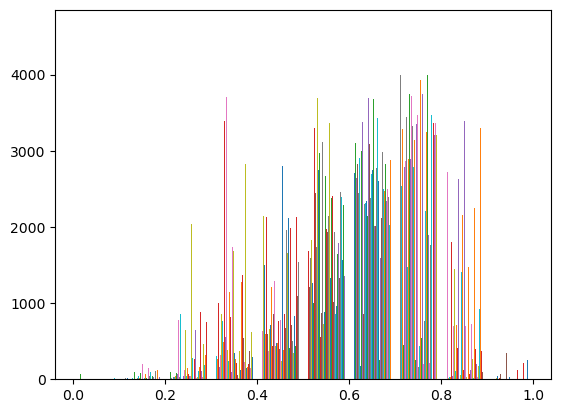

In [ ]:
plt.hist(distance_matrix) # see histogram of distance metrics first

In [ ]:
# Cluster with cosine similarity
agg_clust = AgglomerativeClustering(n_clusters=15, metric='cosine', linkage='average')
clusters = agg_clust.fit_predict(X)

In [19]:
clusters.shape

(10000,)

In [18]:
acnt_merc_mos.shape

(10000, 1390, 36)

In [20]:
# Identify top 10 merchants, number of users spending money at those merchants, and total number of users per cluster
ordered_merchants = acnt_date_merc_spend.merchant.unique()

clust_mercs = pd.DataFrame(np.concatenate([np.sum(acnt_merc_mos, axis=-1), clusters.reshape(-1, 1)], axis=1))
clust_mercs.columns = list(ordered_merchants) + ['Cluster']
clust_mercs

,AMAZON,DUNKIN DONUTS,EXXON MOBIL,PNC BANK,IHOP,SUBWAY,WAWA,ADVANCE AUTO PARTS INC,SNAPCHAT,ESURANCE,...,CADENCE BANK,GOLDEN PLAINS CU,SEACOMM FCU,UNION BANK & TRUST,TRAVIS CU,LAROSAS PIZZERIA,MCCORMICK & SCHMICKS,MOORES CLOTHING,FAMILY FRESH MARKET,Cluster
0,1181.26,16.51,64.28,23574.01,190.03,20.57,260.81,97.54,5.07,767.92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,687.14,377.48,62.90,988.67,0.00,102.00,5230.01,0.00,0.00,2117.49,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6774.21,0.00,0.00,0.00,0.00,242.69,0.00,88.12,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,207.49,65.52,151.08,0.00,34.97,97.80,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,160.34,4.68,0.00,40.01,0.00,9.73,14.19,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,39.65,0.00,0.00,0.00,0.00,7.21,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,50.21,32.76,0.00,13983.60,0.00,0.00,348.93,140.24,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,76.53,52.82,0.00,0.00,0.00,56.25,0.00,56.06,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,1271.93,0.00,0.00,3247.87,158.45,73.88,0.00,0.00,0.00,1992.62,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# Get top 10 merchants by total spend per each cluster
clust_merc_sums = clust_mercs.groupby('Cluster').sum()
top_10_columns = clust_merc_sums.apply(lambda row: row.nlargest(10).index.tolist(), axis=1)
top_10_columns = top_10_columns.apply(pd.Series)
top_10_columns.columns = ['Top ' + str(i+1) for i in range(10)]
top_10_columns

,Top 1,Top 2,Top 3,Top 4,Top 5,Top 6,Top 7,Top 8,Top 9,Top 10
Cluster,,,,,,,,,,
0.0,WALMART,7-ELEVEN,AMAZON,U.S. BANK,PNC BANK,KROGER,SQUARE,ATT,T-MOBILE,TARGET
1.0,USPS,WALMART,KROGER,U.S. BANK,SPRINT,AMAZON,PNC BANK,7-ELEVEN,WHOLE FOODS MARKET,LYFT
2.0,WALMART,SQUARE,7-ELEVEN,AMAZON,KROGER,PNC BANK,U.S. BANK,UBER TECHNOLOGIES,LYFT,ATT
3.0,WALMART,U.S. BANK,7-ELEVEN,FAMILY DOLLAR,AMAZON,ATT,UBER TECHNOLOGIES,QUIKTRIP,SUDDENLINK,CRICKET WIRELESS
4.0,WALMART,PNC BANK,7-ELEVEN,U.S. BANK,AMAZON,KROGER,SQUARE,FACEBOOK MESSENGER,METROPCS,MCDONALDS
5.0,WALMART,7-ELEVEN,U.S. BANK,SQUARE,AMAZON,KROGER,PNC BANK,T-MOBILE,MCDONALDS,ATT
6.0,WALMART,7-ELEVEN,AMAZON,SQUARE,USPS,U.S. BANK,APPLE PAY,TARGET,VERIZON,PNC BANK
7.0,EXPEDIA,SQUARE,GEICO,AMAZON,WALMART,ATT,APPLE PAY,T-MOBILE,CARDTRONICS,7-ELEVEN
8.0,SQUARE,WALMART,7-ELEVEN,AMAZON,LYFT,AVIS CAR RENTAL,ENTERPRISE,TD BANK,SAMS CLUB,COSTCO


In [ ]:
# Get number of users spending money at top 10 merchants per cluster
for cluster in top_10_columns.index:
    clust_top10 = clust_mercs[clust_mercs['Cluster'] == cluster].drop(columns=['Cluster'])[top_10_columns.loc[cluster]]
    clust_top10[clust_top10 != 0.0] = 1.0
    clust_top10.sum(axis=0)

WALMART      9381.0
7-ELEVEN     6348.0
AMAZON       8533.0
U.S. BANK    1813.0
PNC BANK     1642.0
KROGER       3000.0
SQUARE       2756.0
ATT          3379.0
T-MOBILE     2702.0
TARGET       7351.0
dtype: float64
USPS                  2.0
WALMART               7.0
KROGER                5.0
U.S. BANK             3.0
SPRINT                3.0
AMAZON                6.0
PNC BANK              2.0
7-ELEVEN              6.0
WHOLE FOODS MARKET    2.0
LYFT                  5.0
dtype: float64
WALMART              189.0
SQUARE                82.0
7-ELEVEN             133.0
AMAZON               159.0
KROGER                58.0
PNC BANK              29.0
U.S. BANK             44.0
UBER TECHNOLOGIES    121.0
LYFT                 115.0
ATT                   63.0
dtype: float64
WALMART              4.0
U.S. BANK            1.0
7-ELEVEN             3.0
FAMILY DOLLAR        3.0
AMAZON               4.0
ATT                  1.0
UBER TECHNOLOGIES    3.0
QUIKTRIP             1.0
SUDDENLINK           1.0


In [34]:
# Total number of users per cluster
clust_total_users = clust_mercs.groupby('Cluster').count().iloc[:, 0]
clust_total_users.name = 'Total Users'
clust_total_users

Cluster
0.0     9545
1.0        7
2.0      193
3.0        4
4.0       17
5.0       81
6.0       46
7.0        4
8.0        7
9.0        6
10.0       2
11.0      17
12.0       8
13.0      48
14.0      15
Name: Total Users, dtype: int64